In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import seaborn as sns
import rasterio as rio
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
#import Process_sb_tiff
import geotiff_processing.process_sb_tiff
import geotiff_processing.hillshades_pca
import geotiff_processing.geotiff_plotting
import geotiff_processing.write_mapfile

In [4]:
import datetime
def nowTime():
    return datetime.datetime.now().strftime("%H:%M:%S")
def now():
    return datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
def snow():
    return datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
def today():
    return datetime.datetime.now().strftime("%Y-%m-%d")
def stoday():
    return datetime.datetime.now().strftime("%Y%m%d")

# grab the hexcolor codes from the file

In [5]:
EMerald_colors_hex = geotiff_processing.process_sb_tiff.EMerald_custom_colors_hexcolorcodes
EMerald_colors_hex

['#0000ff',
 '#01ffff',
 '#3fca3f',
 '#f19898',
 '#deb201',
 '#896651',
 '#f1bfff',
 '#fffafc']

In [6]:
sns.color_palette(EMerald_colors_hex)

[(0.0, 0.0, 1.0),
 (0.00392156862745098, 1.0, 1.0),
 (0.24705882352941178, 0.792156862745098, 0.24705882352941178),
 (0.9450980392156862, 0.596078431372549, 0.596078431372549),
 (0.8705882352941177, 0.6980392156862745, 0.00392156862745098),
 (0.5372549019607843, 0.4, 0.3176470588235294),
 (0.9450980392156862, 0.7490196078431373, 1.0),
 (1.0, 0.9803921568627451, 0.9882352941176471)]

# test hex to rgb functionality

In [7]:
EMerald_colors_rgb = pd.DataFrame()
for ii in range(0, len(EMerald_colors_hex)):
    hexcolor = EMerald_colors_hex[ii]
    EMerald_colors_rgb.loc[ii, ['r','g','b']] = geotiff_processing.process_sb_tiff.hex_to_rgb(hexcolor)[0], \
                                                geotiff_processing.process_sb_tiff.hex_to_rgb(hexcolor)[1], \
                                                geotiff_processing.process_sb_tiff.hex_to_rgb(hexcolor)[2]
EMerald_colors_rgb

r    g    b
0    0    0  255
1    1  255  255
2   63  202   63
3  241  152  152
4  222  178    1
5  137  102   81
6  241  191  255
7  255  250  252

In [8]:
ii=1
geotiff_processing.process_sb_tiff.rgb_to_hex(EMerald_colors_rgb.loc[ii, 'r'], EMerald_colors_rgb.loc[ii, 'g'], EMerald_colors_rgb.loc[ii, 'b'])

'#01ffff'

# define single-band geotiff

In [9]:
tiff_dir = os.getcwd()

#single_band_tiff = 'E020N40.tif'
single_band_tiff = 'Anchieta_demo_dem.tif'
#single_band_tiff = 'Envisat_ASAR_2003-08-04.tif'
#single_band_tiff = 'vestfold.tif'

single_band_tiff = os.path.join(single_band_tiff.split('.')[0], single_band_tiff)
single_band_tiff

'Anchieta_demo_dem/Anchieta_demo_dem.tif'

In [10]:
single_band_tiff_path = os.path.join(tiff_dir, single_band_tiff)
single_band_tiff_path

'/Users/bbloss/EMeraldCodes/ben_test_scratch/Anchieta_demo_dem/Anchieta_demo_dem.tif'

# inspect colormap generator function

In [11]:
# read data and minimally process for the colormap function
with rio.open(single_band_tiff_path, 'r') as src:
    data = src.read(1)  # Read the first band
    no_data_value = src.nodata  # Get the no-data value from the GeoTIFF
    epsg_code = src.crs.to_epsg() if src.crs else None
    origprofile = src.profile


print(f"no_data_value = {no_data_value}")
print(f"data_min_max = [{np.min(data[data!=no_data_value])}, {np.max(data)}]")
print(f"epsg_code = {epsg_code}")
print(f"src.crs = {src.crs}")
print(f"origprofile = {origprofile}")

no_data_value = 1.701410009187828e+38
data_min_max = [0.0, 60.0]
epsg_code = 31984
src.crs = EPSG:31984
origprofile = {'driver': 'GTiff', 'dtype': 'float64', 'nodata': 1.701410009187828e+38, 'width': 451, 'height': 348, 'count': 1, 'crs': CRS.from_epsg(31984), 'transform': Affine(8.008846119733992, 0.0, 328021.1052,
       0.0, -8.000517241378454, 7703966.89), 'blockysize': 2, 'tiled': False, 'interleave': 'band'}


In [12]:
data

array([[ 0.,  0.,  0., ..., 54., 54., 52.],
       [ 0.,  0.,  0., ..., 54., 52., 52.],
       [ 0.,  0.,  0., ..., 52., 52., 52.],
       ...,
       [ 0.,  0.,  0., ..., 30., 30., 30.],
       [ 0.,  0.,  0., ..., 30., 30., 30.],
       [ 0.,  0.,  0., ..., 30., 30., 30.]])

In [13]:
# dataranges to test
#datarange = [-1, 2000]
#datarange = [-1, 4000]
#datarange = [-28, 2540]
#datarange = [-285, 4000]
#datarange = [-400, 400]
#datarange = [-407, 5825]
#datarange = [-400, 0]
#datarange = [-400, -1]
#datarange = [-249, 6]
#datarange = [0, 5000]
#datarange = [0, 500]
#datarange = [0, 255]
datarange = [0, 60]
#datarange = [0, 54]
#datarange = [1000, 5000]
#datarange = [200, 100]
#datarange = [100, 200]
#datarange = [44, 255]
#datarange = [-200, 200]

datarange

[0, 60]

In [14]:
# Clip data values to the specified range
clipped_data = np.clip(data, datarange[0], datarange[1])

# un-clip the orig_data with no_data_vaules to exclude from the perenctile calculations
clipped_data_with_dum = clipped_data.copy()
if no_data_value is not None:
    clipped_data_with_dum[data==no_data_value] = no_data_value


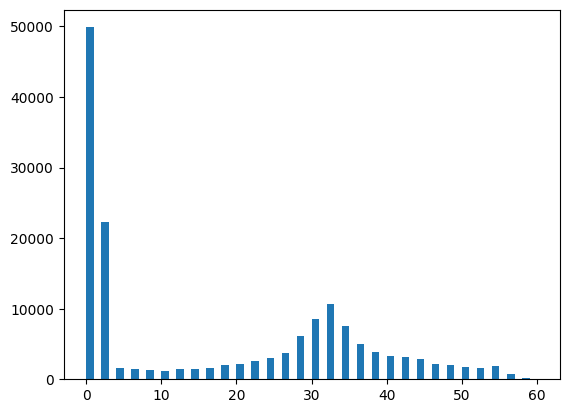

In [18]:
plt.hist(clipped_data_with_dum.flatten().flatten(), bins=min(datarange[1]-datarange[0], 100))
plt.show()

datarange = [0, 60]


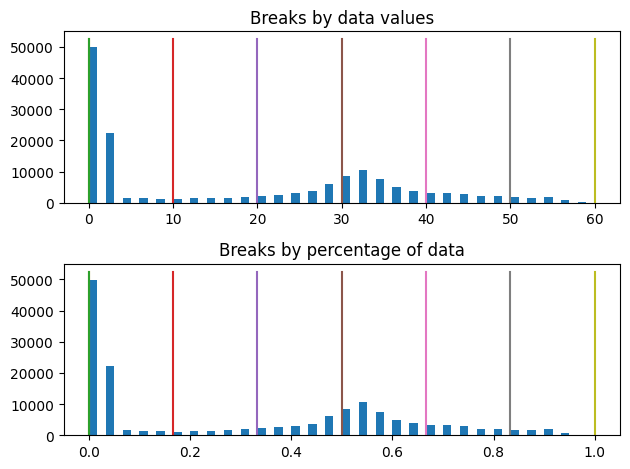

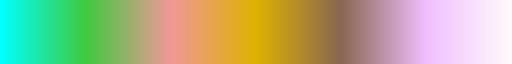

In [19]:
# make percentile ranges for pseudo_linear
cmap_method = 'pseudo_linear'

print(f"datarange = {datarange}")
breaks_1, breaks_data = geotiff_processing.process_sb_tiff.make_percentile_array(data_min_max=datarange,
                                                              data=clipped_data_with_dum,
                                                              no_data_value=no_data_value,
                                                              cmap_method=cmap_method,
                                                              plot_histograms=True)
EMeraldCustomColorMap = geotiff_processing.process_sb_tiff.build_EMerald_terrain_colormap(breaks_1)
EMeraldCustomColorMap

datarange = [0, 60]


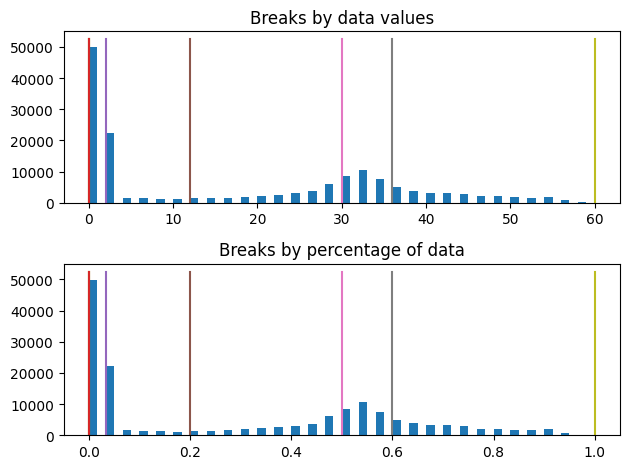

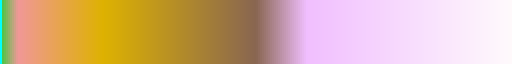

In [20]:
# make percentile ranges for pseudo_hist_norm
cmap_method = 'pseudo_hist_norm'

print(f"datarange = {datarange}")
breaks_1, breaks_data = geotiff_processing.process_sb_tiff.make_percentile_array(data_min_max=datarange,
                                                              data=clipped_data_with_dum,
                                                              no_data_value=no_data_value,
                                                              cmap_method=cmap_method,
                                                              plot_histograms=True)
EMeraldCustomColorMap = geotiff_processing.process_sb_tiff.build_EMerald_terrain_colormap(breaks_1)
EMeraldCustomColorMap

# convert single-band geotiff to rgba geotiff

In [21]:
output_tif = True
#output_tif = False

plot_rgba_raster = True
#plot_rgba_raster = False

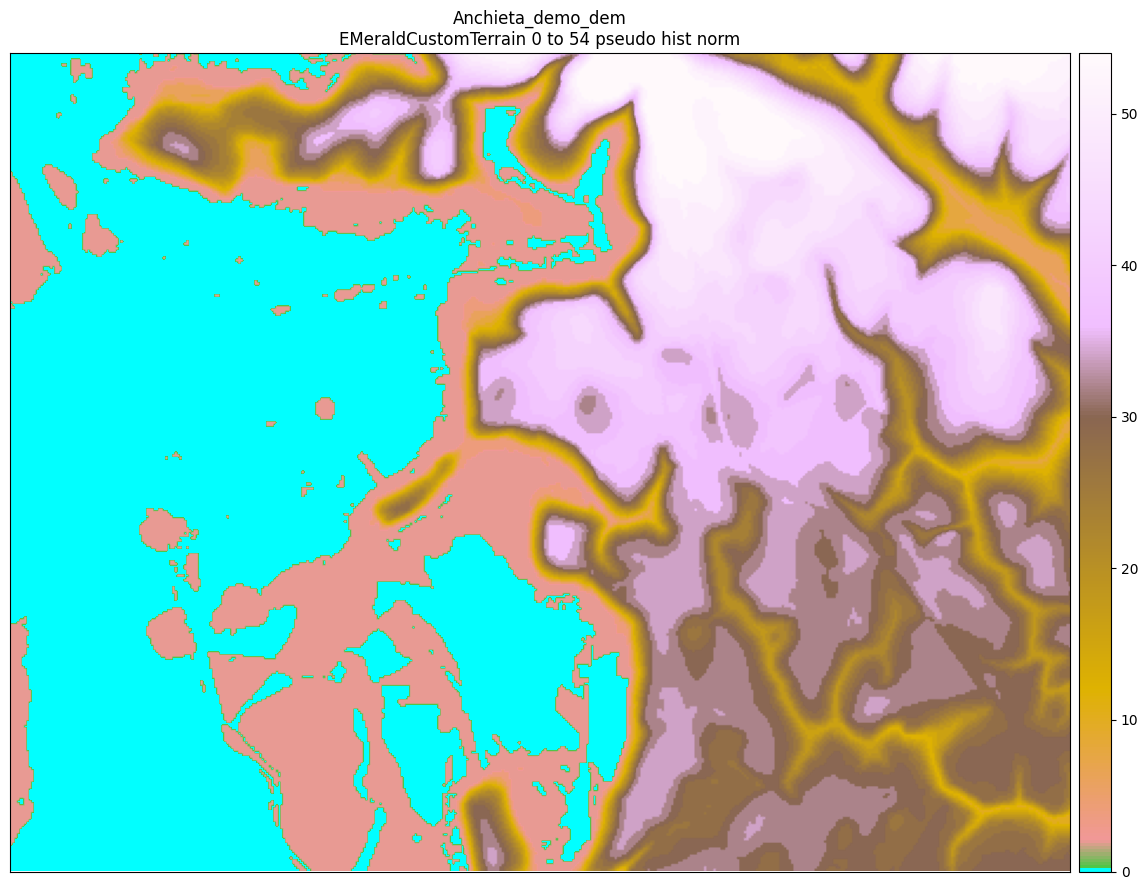

Wrote 1component LUT files to: '/Users/bbloss/EMeraldCodes/ben_test_scratch/Anchieta_demo_dem/Anchieta_demo_dem_EMeraldCustomTerrain_0_to_54_pseudo_hist_norm_r.lut'
Wrote 1component LUT files to: '/Users/bbloss/EMeraldCodes/ben_test_scratch/Anchieta_demo_dem/Anchieta_demo_dem_EMeraldCustomTerrain_0_to_54_pseudo_hist_norm_g.lut'
Wrote 1component LUT files to: '/Users/bbloss/EMeraldCodes/ben_test_scratch/Anchieta_demo_dem/Anchieta_demo_dem_EMeraldCustomTerrain_0_to_54_pseudo_hist_norm_b.lut'
Wrote 1component LUT files to: '/Users/bbloss/EMeraldCodes/ben_test_scratch/Anchieta_demo_dem/Anchieta_demo_dem_EMeraldCustomTerrain_0_to_54_pseudo_hist_norm_a.lut'
wrote 4component Lut files to: '/Users/bbloss/EMeraldCodes/ben_test_scratch/Anchieta_demo_dem/Anchieta_demo_dem_rgba_EMeraldCustomTerrain_0_to_54_pseudo_hist_norm_qgis_color_table.txt''
wrote 4component Lut files to: '/Users/bbloss/EMeraldCodes/ben_test_scratch/Anchieta_demo_dem/Anchieta_demo_dem_rgba_EMeraldCustomTerrain_0_to_54_pseudo_h

In [22]:
ph_colormap, ph_data_breaks, ph_percentile_breaks = geotiff_processing.process_sb_tiff.make_rgba_tiff_from_single_Band(single_band_tiff_path,
                                                              #data_min_max=datarange,
                                                              cmap_method='pseudo_hist_norm',
                                                              output_tif=output_tif,
                                                              plot_rgba_raster=plot_rgba_raster)

#ph_colormap, ph_data_breaks, ph_percentile_breaks = geotiff_processing.process_sb_tiff.make_rgba_tiff_from_single_Band(single_band_tiff_path,
                                                                #data_min_max=None,
                                                                #min_max_method='percentile',
                                                                #clip_perc=[1, 99],
                                                                #color_palette_name=None,
                                                                #cmap_method='pseudo_hist_norm'
                                                                #output_tif=output_tif,
                                                                #plot_rgba_raster=plot_rgba_raster)

#ph_colormap
print(f"ph_percentile_breaks = {ph_percentile_breaks}")
print(f"ph_data_breaks = {ph_data_breaks}")

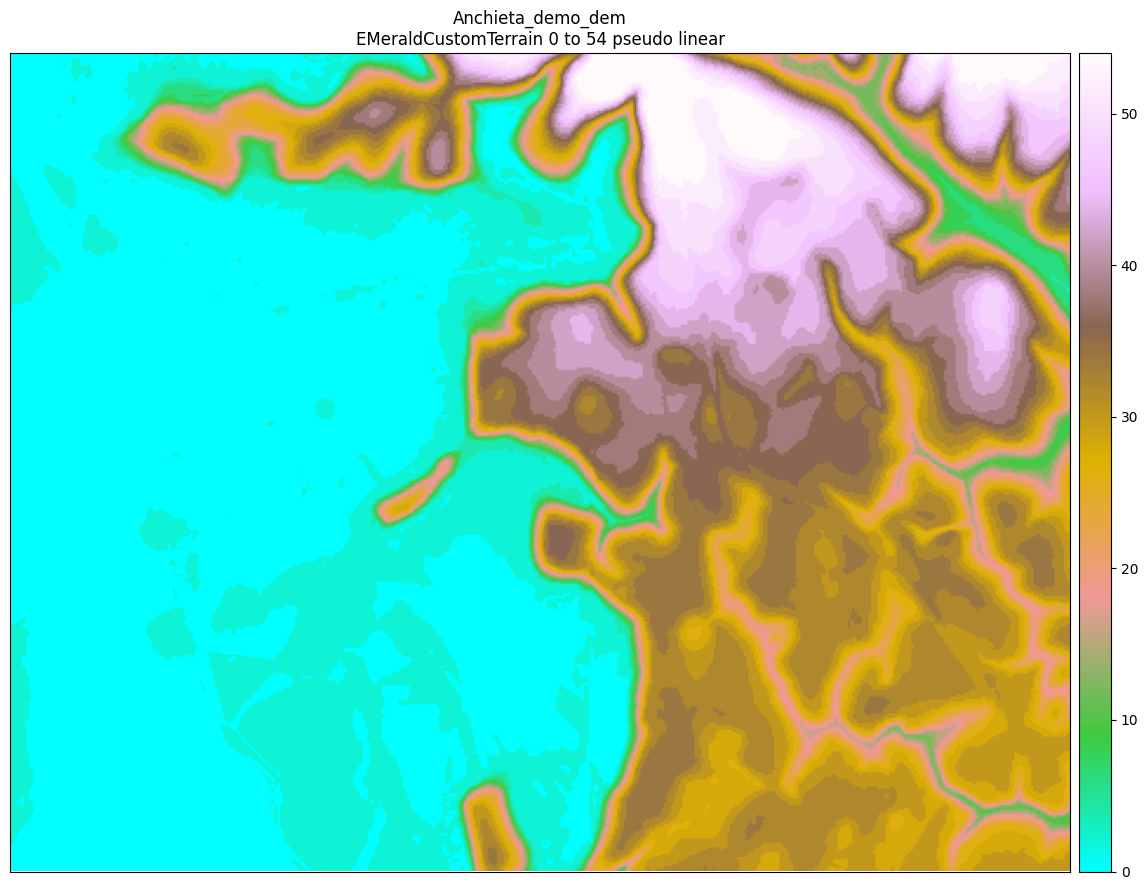

Wrote 1component LUT files to: '/Users/bbloss/EMeraldCodes/ben_test_scratch/Anchieta_demo_dem/Anchieta_demo_dem_EMeraldCustomTerrain_0_to_54_pseudo_linear_r.lut'
Wrote 1component LUT files to: '/Users/bbloss/EMeraldCodes/ben_test_scratch/Anchieta_demo_dem/Anchieta_demo_dem_EMeraldCustomTerrain_0_to_54_pseudo_linear_g.lut'
Wrote 1component LUT files to: '/Users/bbloss/EMeraldCodes/ben_test_scratch/Anchieta_demo_dem/Anchieta_demo_dem_EMeraldCustomTerrain_0_to_54_pseudo_linear_b.lut'
Wrote 1component LUT files to: '/Users/bbloss/EMeraldCodes/ben_test_scratch/Anchieta_demo_dem/Anchieta_demo_dem_EMeraldCustomTerrain_0_to_54_pseudo_linear_a.lut'
wrote 4component Lut files to: '/Users/bbloss/EMeraldCodes/ben_test_scratch/Anchieta_demo_dem/Anchieta_demo_dem_rgba_EMeraldCustomTerrain_0_to_54_pseudo_linear_qgis_color_table.txt''
wrote 4component Lut files to: '/Users/bbloss/EMeraldCodes/ben_test_scratch/Anchieta_demo_dem/Anchieta_demo_dem_rgba_EMeraldCustomTerrain_0_to_54_pseudo_linear_lut.lut''

In [23]:
pl_colormap, pl_data_breaks, pl_percentile_breaks = geotiff_processing.process_sb_tiff.make_rgba_tiff_from_single_Band(single_band_tiff_path,
                                                              #data_min_max=datarange,
                                                              cmap_method='pseudo_linear',
                                                              output_tif=output_tif,
                                                              plot_rgba_raster=plot_rgba_raster)

#pl_colormap, pl_data_breaks, pl_percentile_breaks = geotiff_processing.process_sb_tiff.make_rgba_tiff_from_single_Band(single_band_tiff_path,
                                                               #data_min_max=None,
                                                               #min_max_method='percentile',
                                                               #clip_perc=[1, 99],
                                                               #color_palette_name=None,
                                                               #cmap_method='pseudo_linear',
                                                               #output_tif=output_tif,
                                                               #plot_rgba_raster=plot_rgba_raster))

#pl_colormap
print(f"pl_percentile_breaks = {pl_percentile_breaks}")
print(f"pl_data_breaks = {pl_data_breaks}")

# build bit for hillshades

In [26]:
# valid azimuths = [0 : 360]
start_az = 90
num_az_angles = 8

# valid alitudes = [0 : 90]
start_al = 30
al_inc = 30
num_al_angles = 2

In [27]:
hs_azimuths, hs_altitudes = geotiff_processing.hillshades_pca.build_hs_az_al(start_al=start_al, al_inc=al_inc, num_al_angles=num_al_angles, start_az=start_az, num_az_angles=num_az_angles)

azimuths = [0, 45, 90, 135, 180, 225, 270, 315]
altitudes = [30, 60]


In [28]:
data_min_max = [min(ph_data_breaks), max(ph_data_breaks)]
data_min_max

[0.0, 54.0]

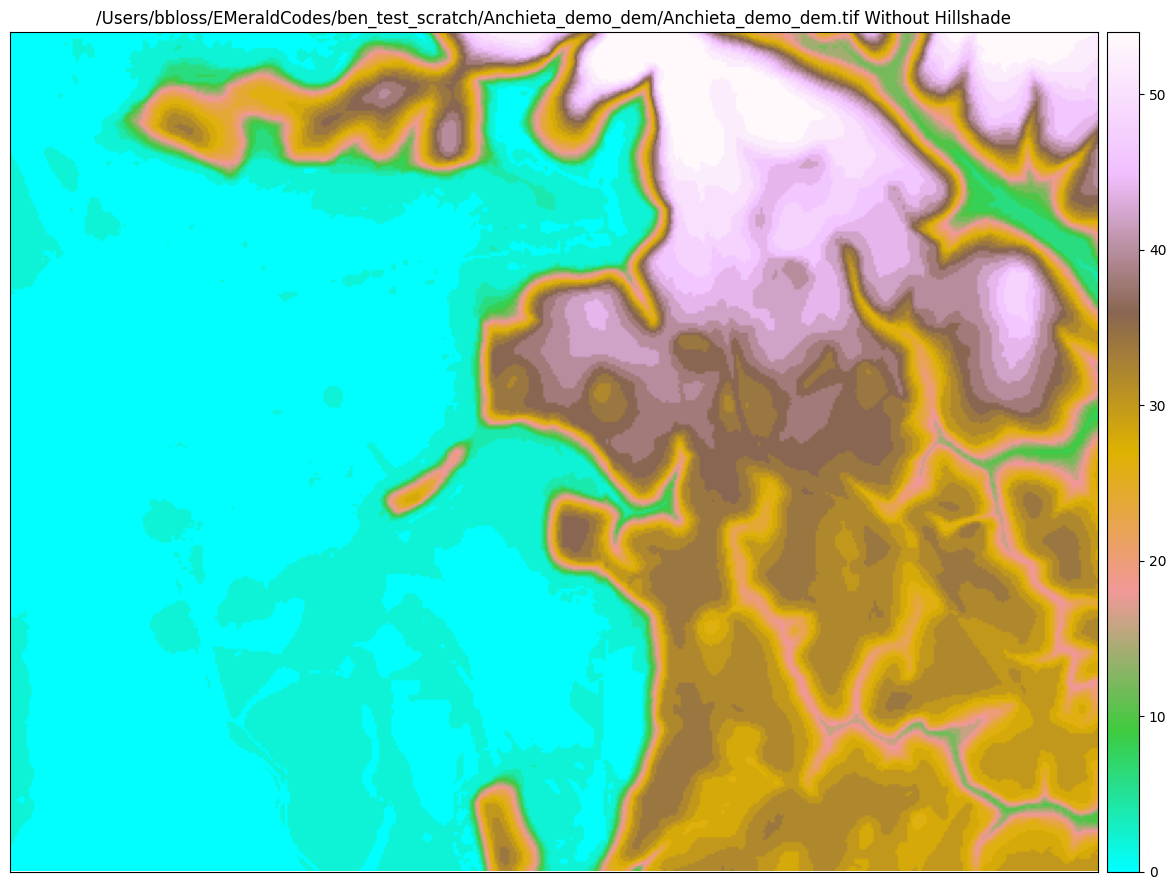

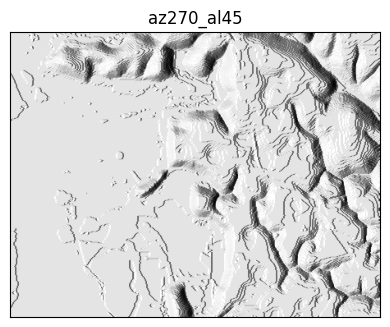

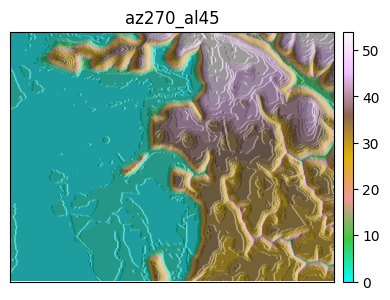

New RGBA geotiff '/Users/bbloss/EMeraldCodes/ben_test_scratch/Anchieta_demo_dem/Anchieta_demo_dem_hillshade_az270_al45.tif' generated successfully!


In [30]:
hillshades = geotiff_processing.hillshades_pca.build_hillshade(single_band_tiff_path,
                                                               data_min_max,
                                                               hs_azimuths=[270],
                                                               hs_altitudes=[45],
                                                               #cmap=ph_colormap,
                                                               cmap=pl_colormap,
                                                               process_pca=False,
                                                               plot_figures = True)

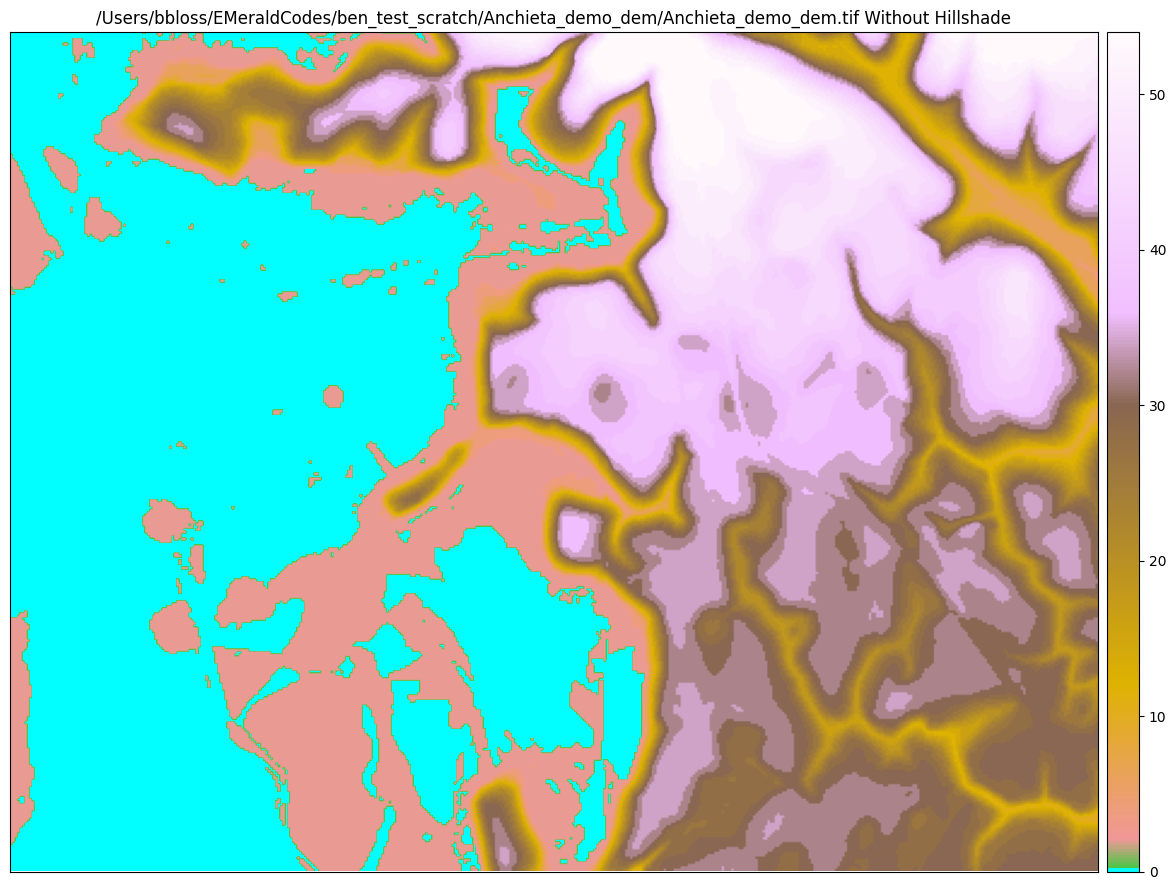

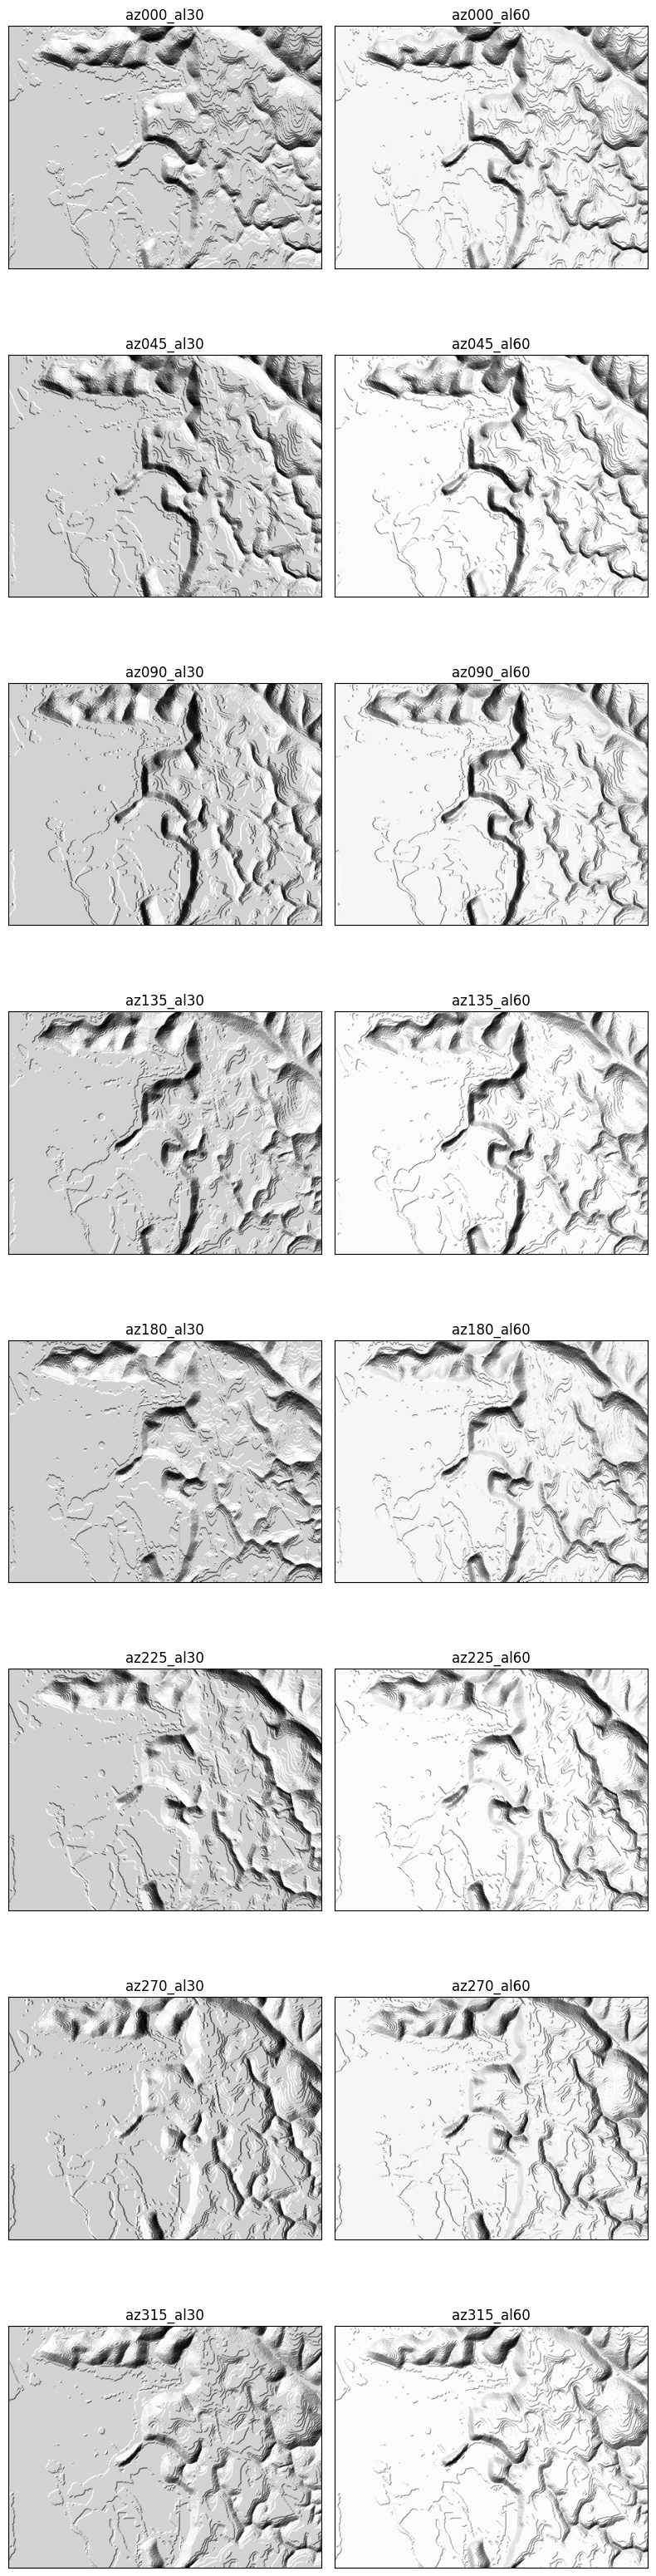

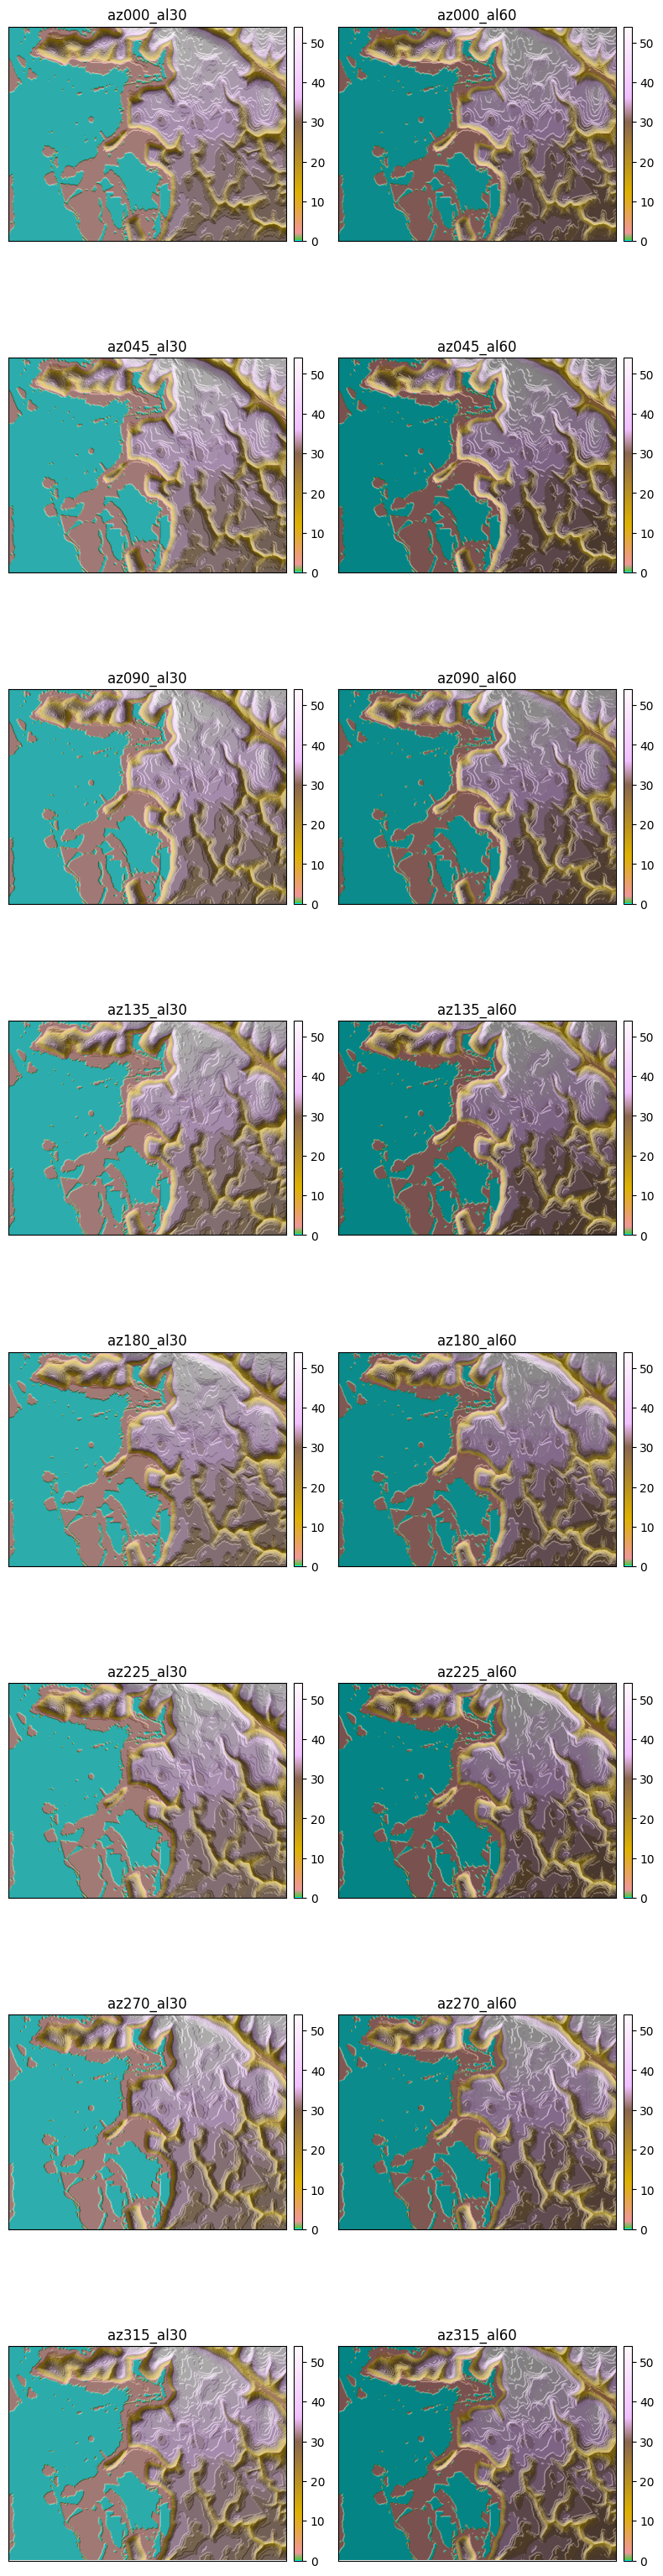

New RGBA geotiff '/Users/bbloss/EMeraldCodes/ben_test_scratch/Anchieta_demo_dem/Anchieta_demo_dem_hillshade_az000_al30.tif' generated successfully!
New RGBA geotiff '/Users/bbloss/EMeraldCodes/ben_test_scratch/Anchieta_demo_dem/Anchieta_demo_dem_hillshade_az000_al60.tif' generated successfully!
New RGBA geotiff '/Users/bbloss/EMeraldCodes/ben_test_scratch/Anchieta_demo_dem/Anchieta_demo_dem_hillshade_az045_al30.tif' generated successfully!
New RGBA geotiff '/Users/bbloss/EMeraldCodes/ben_test_scratch/Anchieta_demo_dem/Anchieta_demo_dem_hillshade_az045_al60.tif' generated successfully!
New RGBA geotiff '/Users/bbloss/EMeraldCodes/ben_test_scratch/Anchieta_demo_dem/Anchieta_demo_dem_hillshade_az090_al30.tif' generated successfully!
New RGBA geotiff '/Users/bbloss/EMeraldCodes/ben_test_scratch/Anchieta_demo_dem/Anchieta_demo_dem_hillshade_az090_al60.tif' generated successfully!
New RGBA geotiff '/Users/bbloss/EMeraldCodes/ben_test_scratch/Anchieta_demo_dem/Anchieta_demo_dem_hillshade_az13

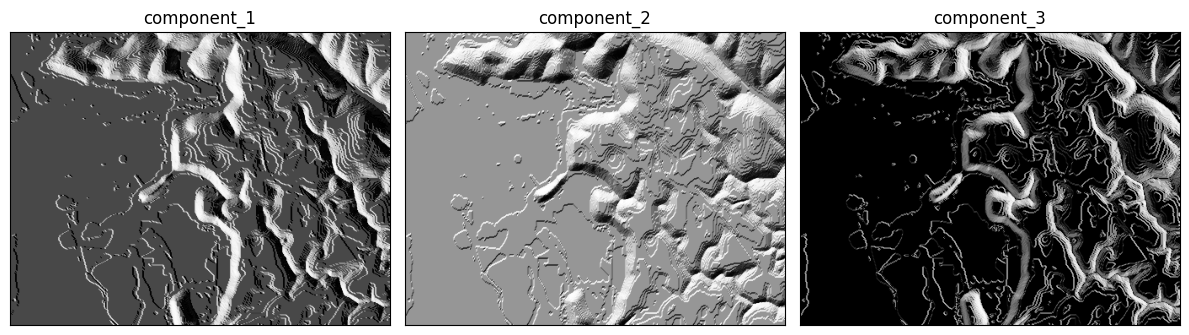

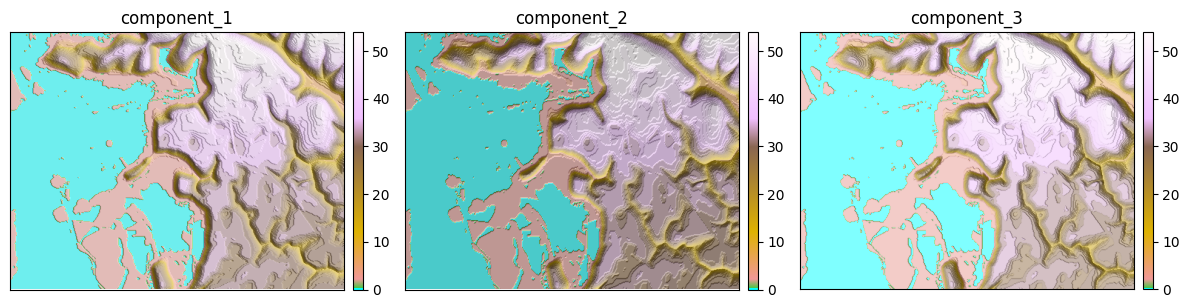

New RGBA geotiff '/Users/bbloss/EMeraldCodes/ben_test_scratch/Anchieta_demo_dem/Anchieta_demo_dem_hillshade_pca16-component_1.tif' generated successfully!
New RGBA geotiff '/Users/bbloss/EMeraldCodes/ben_test_scratch/Anchieta_demo_dem/Anchieta_demo_dem_hillshade_pca16-component_2.tif' generated successfully!
New RGBA geotiff '/Users/bbloss/EMeraldCodes/ben_test_scratch/Anchieta_demo_dem/Anchieta_demo_dem_hillshade_pca16-component_3.tif' generated successfully!


In [31]:
hillshades, pcaComponents = geotiff_processing.hillshades_pca.build_hillshade(single_band_tiff_path,
                                                                              data_min_max,
                                                                              hs_azimuths,
                                                                              hs_altitudes,
                                                                              cmap=ph_colormap,
                                                                              process_pca=True,
                                                                              plot_figures=True)

# write a mapsource mapfile filename and write the mapfile

In [32]:
writeLUTs=True
writeTifs=True
writeHillshades=True

In [33]:
writeLUTs=True
writeTifs=True
writeHillshades=True

mapfile_path = f"{single_band_tiff_path.split('.tif')[0]}"
if writeLUTs:
    mapfile_path = f"{mapfile_path}_LUT"
if writeTifs:
    mapfile_path = f"{mapfile_path}_AuxTif"
if writeHillshades:
    mapfile_path = f"{mapfile_path}_HS"


mapfile_path = f"{mapfile_path}.map"

mapfile_path

'/Users/bbloss/EMeraldCodes/ben_test_scratch/Anchieta_demo_dem/Anchieta_demo_dem_LUT_AuxTif_HS.map'

In [34]:
geotiff_processing.write_mapfile.generate_LUT_based_mapfile(single_band_tiff_path, mapfile_path, writeLUTs=writeLUTs, writeTifs=writeTifs, writeHillshades=writeHillshades)

## Mapfile written on 2024-04-16 at 15:34:30
MAP
    NAME "Anchieta_demo_dem"
    EXTENT 328021.1052 7701182.71 331633.0948 7703966.89
    SIZE 451 348
    PROJECTION
        "init=EPSG:31984"  # Set the EPSG code
    END

    WEB
        METADATA
          'wms_title'          'Anchieta_demo_dem'
          'wms_enable_request' '*'
          'wms_srs'            'EPSG:31984'
        END 
    END
    
    LAYER
        NAME "Anchieta_demo_dem"
        DATA "Anchieta_demo_dem.tif"
        TYPE RASTER
        STATUS ON
        EXTENT 328021.1052 7701182.71 331633.0948 7703966.89
        PROJECTION
            "init=EPSG:31984"
        END
        PROCESSING "NODATA=1.701410009187828e+38"  # Set your desired Nodata value
        PROCESSING "LUT=0.0:0, 60.0:255"  # Define the LUT (elevation:color)
    END
    
    LAYER
        NAME "Anchieta_demo_dem_EMeraldCustomTerrain_0_to_54_pseudo_linear"
        DATA "Anchieta_demo_dem.tif"
        TYPE RASTER
        STATUS ON
        EXTENT 328021.